# PerceptionMetrics basic tutorial
PerceptionMetrics provides a unified evaluation pipeline for perception models, currently focused in semantic segmentation in unstructured environments. For this basic tutorial, we are going to evaluate an image segmentation model on RELLIS-3D test dataset.

## Download required data

#### Dataset (RELLIS-3D)
📝 [Paper](https://arxiv.org/abs/2011.12954)
🧑‍💻️ [Repo](https://github.com/unmannedlab/RELLIS-3D)

In [ ]:
!pip install gdown

In [ ]:
!mkdir -p local/data && cd local/data

# Download
!gdown 1zHmnVaItcYJAWat3Yti1W_5Nfux194WQ -O local/data/  # split
!gdown 1K8Zf0ju_xI5lnx3NTDLJpVTs59wmGPI6 -O local/data/  # ontology
!gdown 16URBUQn_VOGvUqfms-0I8HHKMtjPHsu5 -O local/data/  # labels

!gdown 1F3Leu0H_m6aPVpZITragfreO_SGtL2yV -O local/data/  # images

In [ ]:
# Unzip
!unzip -o local/data/Rellis_3D_image_split.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_ontology.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node_label_id.zip -d local/data/rellis3d/
!unzip -o local/data/Rellis_3D_pylon_camera_node.zip -d local/data/rellis3d/

#### Model (PyTorch)

In [ ]:
# Download
!gdown 15Py3AKyGzWNX4M3OJKlQQsnH6IehkoEd -O local/data/image_segmentation_model.pth            # model
!gdown 17eJ6aei6yBAbK1aA4mhTeMdXYycorqcT -O local/data/image_segmentation_model_cfg.json       # configuration
!gdown 1spXt5_ISG1ZaHHO2DTtCSqgkohnhwuzt -O local/data/image_segmentation_model_ontology.json  # ontology

## Init dataset and model objects

In [ ]:
from perceptionmetrics.datasets import Rellis3DImageSegmentationDataset
from perceptionmetrics.models import TorchImageSegmentationModel

dataset = Rellis3DImageSegmentationDataset(
    dataset_dir="local/data/rellis3d/Rellis-3D",
    split_dir="local/data/rellis3d",
    ontology_fname="local/data/rellis3d/Rellis_3D_ontology/ontology.yaml",
)

model = TorchImageSegmentationModel(
    model="local/data/image_segmentation_model.pth",
    model_cfg="local/data/image_segmentation_model_cfg.json",
    ontology_fname="local/data/image_segmentation_model_ontology.json",
)

Tensorflow not available
Samples retrieved: 5957 / 5957


## Inference

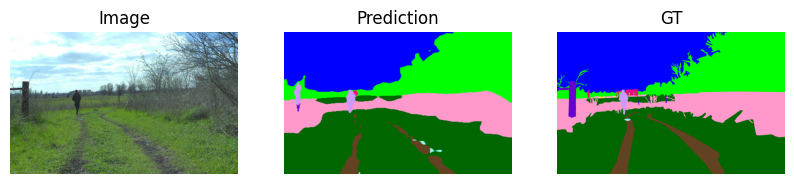

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

from perceptionmetrics.utils import conversion as uc

image_fname = dataset.dataset["image"].iloc[0]
image = Image.open(image_fname)

label_fname = dataset.dataset["label"].iloc[0]
label = Image.open(label_fname)
label = uc.label_to_rgb(label, dataset.ontology)

pred = model.predict(image)
pred = uc.label_to_rgb(pred, model.ontology)
pred = pred.resize(label.size)

plt.figure(figsize=(10, 10))
plt.subplot(131), plt.title("Image"), plt.imshow(np.array(image)), plt.axis("off")
plt.subplot(132), plt.title("Prediction"), plt.imshow(np.array(pred)), plt.axis("off")
plt.subplot(133), plt.title("GT"), plt.imshow(np.array(label)), plt.axis("off")
plt.show()

## Evaluation

In [3]:
results = model.eval(dataset, split="test")
display(results)

  0%|          | 0/1672 [00:00<?, ?it/s]

Tensorflow not available


100%|██████████| 1672/1672 [01:53<00:00, 14.69it/s]
/opt/anaconda3/envs/pm/lib/python3.10/site-packages/perceptionmetrics/utils/segmentation_metrics.py:136: RuntimeWarning: invalid value encountered in divide
  return np.where(denominator > 0, tp / denominator, np.nan)
/opt/anaconda3/envs/pm/lib/python3.10/site-packages/perceptionmetrics/utils/segmentation_metrics.py:192: RuntimeWarning: invalid value encountered in divide
  denominator > 0, 2 * (precision * recall) / denominator, np.nan


,void,dirt,grass,tree,pole,water,sky,vehicle,object,asphalt,...,person,fence,bush,concrete,barrier,puddle,mud,rubble,macro,micro
tp,0.0,0.000000e+00,5.802304e+07,1.596224e+07,0.000000e+00,0.000000e+00,5.085633e+07,1.300000e+01,9.197000e+03,7.114000e+03,...,1.243070e+05,2.110000e+03,2.164840e+07,4.558646e+06,5.436800e+04,1.802634e+06,3.318260e+05,1.400700e+04,NaN,NaN
fp,0.0,0.000000e+00,7.940630e+06,3.076330e+06,0.000000e+00,2.278000e+03,9.526480e+05,3.900000e+01,4.081000e+03,5.580000e+02,...,4.727700e+04,1.018000e+03,4.552348e+06,3.744280e+05,1.447810e+05,3.284380e+05,3.899040e+05,3.809000e+03,NaN,NaN
fn,23.0,4.270000e+02,2.626472e+06,2.767235e+06,8.111400e+04,4.260500e+04,1.115388e+06,9.690000e+04,1.110790e+05,1.643400e+05,...,1.844600e+04,8.944600e+04,7.808532e+06,1.073428e+06,1.501390e+05,5.801570e+05,9.931580e+05,7.077300e+04,NaN,NaN
tn,171212777.0,1.712124e+08,1.026227e+08,1.494070e+08,1.711317e+08,1.711679e+08,1.182884e+08,1.711158e+08,1.710884e+08,1.710408e+08,...,1.710228e+08,1.711202e+08,1.372035e+08,1.652063e+08,1.708635e+08,1.685016e+08,1.694979e+08,1.711242e+08,NaN,NaN
precision,NaN,NaN,8.796212e-01,8.384159e-01,NaN,0.000000e+00,9.816123e-01,2.500000e-01,6.926495e-01,9.272680e-01,...,7.244673e-01,6.745524e-01,8.262512e-01,9.240984e-01,2.730016e-01,8.458813e-01,4.597647e-01,7.862034e-01,0.593164,0.895927
recall,0.0,0.000000e+00,9.566943e-01,8.522524e-01,0.000000e+00,0.000000e+00,9.785386e-01,1.341409e-04,7.646580e-02,4.149218e-02,...,8.707838e-01,2.304600e-02,7.349170e-01,8.094080e-01,2.658491e-01,7.565221e-01,2.504377e-01,1.652159e-01,0.339088,0.895927
accuracy,1.0,9.999975e-01,9.382809e-01,9.658696e-01,9.995262e-01,9.997379e-01,9.879213e-01,9.994338e-01,9.993274e-01,9.990369e-01,...,9.996161e-01,9.994716e-01,9.278040e-01,9.915435e-01,9.982775e-01,9.946932e-01,9.919220e-01,9.995644e-01,0.989593,0.989593
f1_score,NaN,NaN,9.165403e-01,8.452775e-01,NaN,NaN,9.800730e-01,2.681380e-04,1.377271e-01,7.943012e-02,...,7.909155e-01,4.456930e-02,7.779124e-01,8.629592e-01,2.693779e-01,7.987101e-01,3.242524e-01,2.730516e-01,0.507219,0.895927
iou,0.0,0.000000e+00,8.459385e-01,7.320179e-01,0.000000e+00,0.000000e+00,9.609247e-01,1.340870e-04,7.395643e-02,4.135758e-02,...,6.541441e-01,2.279258e-02,6.365439e-01,7.589519e-01,1.556538e-01,6.648771e-01,1.934972e-01,1.581122e-01,0.294945,0.811475
void,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
